In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from flareTools import aflare1

import matplotlib as mpl
mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = 'subset/'

After a flare is identified, fit a gaussian and a flare model (Davenport 2014) to the data to determine whether we have actually found a flare.

In [43]:
def gaussian(x, mu, sigma, A):
    return A/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x - mu)**2/sigma**2/2)

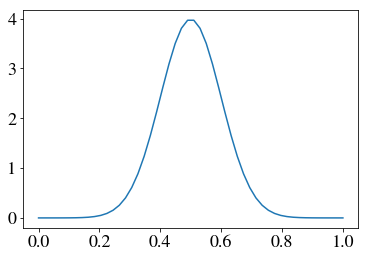

In [44]:
xvals = np.linspace(0, 1)
yvals = gaussian(xvals, 0.5, 0.1, 1)

plt.plot(xvals, yvals)

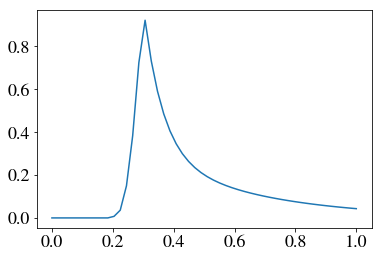

In [45]:
yvals = aflare1(xvals, 0.3, 0.1, 1)

plt.plot(xvals, yvals)

In [46]:
# 1 is a flare, 16 is a spurious detection
df = pd.read_csv('7.gauss.subset.flare_out.csv')
print(len(df))

25


tess2019006130736-s0007-0000000014612845-0131-s_lc.fits


(-0.1, 0.6)

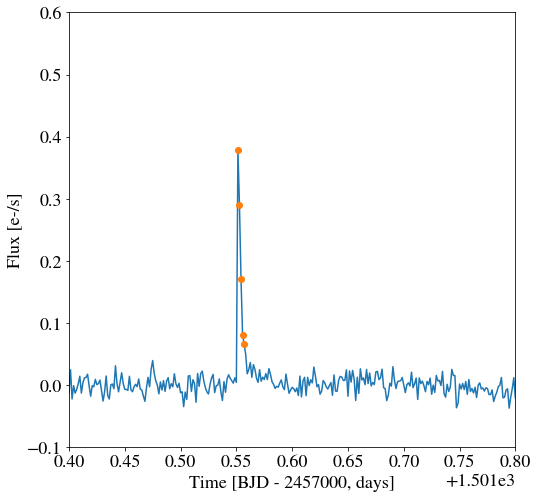

In [56]:
flare_idx = 1
TIC = df.iloc[flare_idx]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'
print(file)

gp_data_file = file + '.gp'
clean_file = file + '.clean'
param_file = file + '.param'
smo, var = np.loadtxt(path + gp_data_file)
time, flux, flux_error = np.loadtxt(path + clean_file)
median, s_window, acf_1dt = np.loadtxt(path + param_file)

tstart = df.iloc[flare_idx]['t0']
tstop = df.iloc[flare_idx]['t1']

x = time
y = flux/median - smo
yerr = np.sqrt((flux_error/median)**2 + var)

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(x, y)

indices = np.where((time >= tstart) & (time <= tstop))[0]
axes.plot(x[indices], y[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
axes.set_xlim(1501.4, 1501.8)
axes.set_ylim(-0.1, 0.6)

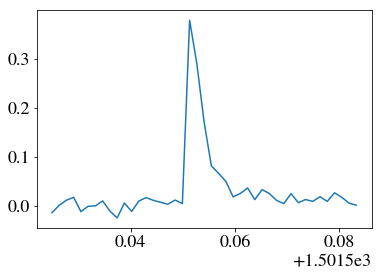

In [62]:
dx_fac = 5
dx = tstop - tstart
x1 = tstart - dx*dx_fac
x2 = tstop + dx*dx_fac
mask = (x > x1) & (x < x2)

plt.plot(x[mask], y[mask])

In [63]:
def chiSq(y_model, ydata, yerr, dof):
    chi2 = np.sum((ydata - y_model)**2/yerr**2)/dof
    return chi2

1501.5540682578403 0.002777737504743527
[1.50155219e+03 1.37453096e-03 1.27696613e-03]
2.7384441062065816


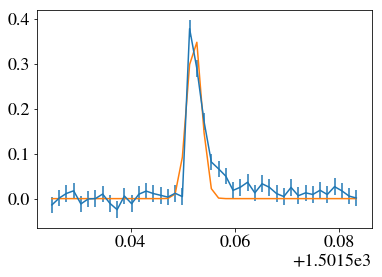

In [64]:
from scipy.optimize import curve_fit

mu0 = (tstart + tstop)/2
sig0 = (tstop - tstart)/2
A0 = 1
print(mu0, sig0)

popt, pcov = curve_fit(gaussian, x[mask], y[mask], p0=(mu0, sig0, A0), sigma=yerr[mask])
print(popt)
y_model = gaussian(x[mask], popt[0], popt[1], popt[2])

c1 = chiSq(y_model, y[mask], yerr[mask], len(y[mask]) - 3)
print(c1)

plt.errorbar(x[mask], y[mask], yerr=yerr[mask])
plt.plot(x[mask], y_model)

[1.50155160e+03 1.62475883e-03 5.87914075e-01]
0.47335925376784926


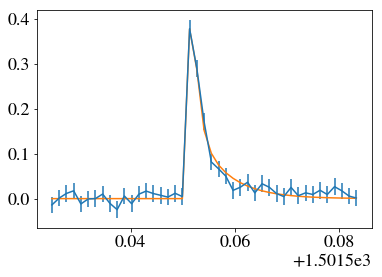

In [65]:
popt, pcov = curve_fit(aflare1, x[mask], y[mask], p0=(mu0, sig0, A0), sigma=yerr[mask])
print(popt)
y_model = aflare1(x[mask], popt[0], popt[1], popt[2])

c2 = chiSq(y_model, y[mask], yerr[mask], len(y[mask]) - 3)
print(c2)

plt.errorbar(x[mask], y[mask], yerr[mask])
plt.plot(x[mask], y_model)

(1502.6, 1502.9)

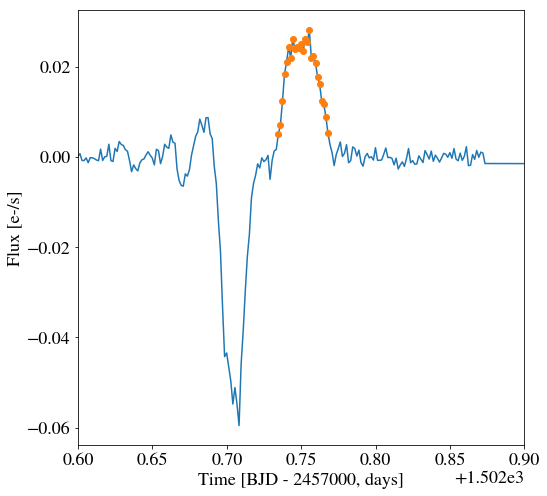

In [66]:
flare_idx = 16
TIC = df.iloc[flare_idx]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

gp_data_file = file + '.gp'
clean_file = file + '.clean'
param_file = file + '.param'
smo, var = np.loadtxt(path + gp_data_file)
time, flux, flux_error = np.loadtxt(path + clean_file)
median, s_window, acf_1dt = np.loadtxt(path + param_file)

tstart = df.iloc[flare_idx]['t0']
tstop = df.iloc[flare_idx]['t1']

x = time
y = flux/median - smo
yerr = np.sqrt((flux_error/median)**2 + var)

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(x, y)

indices = np.where((time >= tstart) & (time <= tstop))[0]
axes.plot(x[indices], y[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
axes.set_xlim(1502.6, 1502.9)
#axes.set_ylim(-0.1, 0.6)

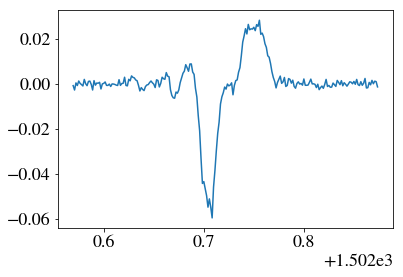

In [67]:
dx = tstop - tstart
x1 = tstart - dx*dx_fac
x2 = tstop + dx*dx_fac
mask = (x > x1) & (x < x2)

plt.plot(x[mask], y[mask])

1502.7513315102801 0.01666642176883215
[1.50275081e+03 9.74498622e-03 6.91831043e-04]
48.50458797640338


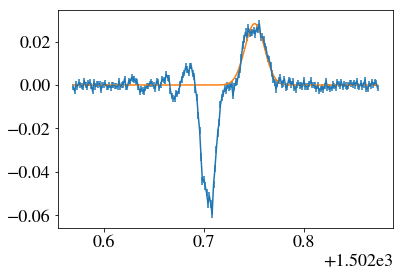

In [68]:
mu0 = (tstart + tstop)/2
sig0 = (tstop - tstart)/2
A0 = 1
print(mu0, sig0)

popt, pcov = curve_fit(gaussian, x[mask], y[mask], p0=(mu0, sig0, A0), sigma=yerr[mask])
print(popt)
y_model = gaussian(x[mask], popt[0], popt[1], popt[2])

c1 = chiSq(y_model, y[mask], yerr[mask], len(y[mask]) - 3)
print(c1)

plt.errorbar(x[mask], y[mask], yerr=yerr[mask])
plt.plot(x[mask], y_model)

[1.50274441e+03 1.49658832e-02 3.24474501e-02]
51.05531951978322


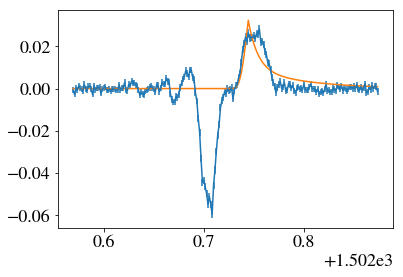

In [69]:
popt, pcov = curve_fit(aflare1, x[mask], y[mask], p0=(mu0, sig0, 1), sigma=yerr[mask])
print(popt)
y_model = aflare1(x[mask], popt[0], popt[1], popt[2])

c2 = chiSq(y_model, y[mask], yerr[mask], len(y[mask]) - 3)
print(c2)

plt.errorbar(x[mask], y[mask], yerr=yerr[mask])
plt.plot(x[mask], y_model)